<a href="https://colab.research.google.com/github/amiralisahraei/Cats-and-dogs-image-detection/blob/main/Cats_and_dogs_image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Classification for cats and dogs

In [1]:
import os, shutil
import cv2
import glob
import numpy as np


Access to Google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Download and unzip dataset file

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 810M/817M [00:08<00:00, 107MB/s] 
100% 817M/817M [00:08<00:00, 105MB/s]


In [ ]:
!unzip "/content/dogs-vs-cats.zip"

Create file to seperate cats and dogs images

In [47]:
os.mkdir('/content/train/train/cat') 
os.mkdir('/content/train/train/dog') 
os.mkdir('/content/my_test') 
os.mkdir('/content/my_test/cat') 
os.mkdir('/content/my_test/dog') 

Seperate Train data

In [7]:
import shutil
# shutil.move('/content/train/train/cat.0.jpg','/content/train/train/cat/')

for image in glob.glob('/content/train/train/*.*.jpg'):
  if image[21:24] == 'cat':
    shutil.move(image,'/content/train/train/cat/')
  else:
    shutil.move(image,'/content/train/train/dog/')

Make test images

In [48]:
counter_cat = 0
counter_dog = 0
for image in glob.glob('/content/train/train/cat/*.*.jpg'):
  if counter_cat < 500:
    shutil.move(image,'/content/my_test/cat')
    counter_cat = counter_cat + 1

for image in glob.glob('/content/train/train/dog/*.*.jpg'):
  if counter_dog < 500:
    shutil.move(image,'/content/my_test/dog')
    counter_dog = counter_dog + 1

Make the model

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32 ,(3,3) , activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64 ,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128 ,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128 ,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile( loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])

Data augmentation

In [51]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

Preprocessing 

In [53]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = train_datagen.flow_from_directory(
       '/content/train/train',
       target_size = (150,150),
       batch_size = 20,
       class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
       '/content/my_test',
       target_size = (150,150),
       batch_size = 20,
       class_mode = 'binary')

Found 24000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [55]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=40,
    validation_data = test_generator,
    validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
100/100 [==============================] - 27s 270ms/step - loss: 0.5011 - acc: 0.7445 - val_loss: 0.4836 - val_acc: 0.7690
Epoch 2/40
100/100 [==============================] - 27s 266ms/step - loss: 0.5012 - acc: 0.7555 - val_loss: 0.4939 - val_acc: 0.7640
Epoch 3/40
100/100 [==============================] - 27s 266ms/step - loss: 0.5035 - acc: 0.7510 - val_loss: 0.5094 - val_acc: 0.7410
Epoch 4/40
100/100 [==============================] - 27s 266ms/step - loss: 0.4873 - acc: 0.7720 - val_loss: 0.4991 - val_acc: 0.7500
Epoch 5/40
100/100 [==============================] - 26s 265ms/step - loss: 0.4744 - acc: 0.7785 - val_loss: 0.4607 - val_acc: 0.7910
Epoch 6/40
100/100 [==============================] - 27s 266ms/step - loss: 0.4834 - acc: 0.7685 - val_loss: 0.4787 - val_acc: 0.7760
Epoch 7/40
100/100 [==============================] - 27s 267ms/step - loss: 0.4747 - acc: 0.7765 - val_loss: 0.5040 - val_acc: 0.7490
Epoch 8/40
100/100 [==============================] - 2

Save model

In [ ]:
model.save('cats_and_dogs_small_2.h5')

Recall the model

In [ ]:
from tensorflow import keras

call_model=keras.models.load_model('/content/cats_and_dogs_small_2.h5')

Plot Diagrams

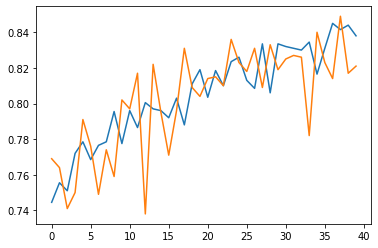

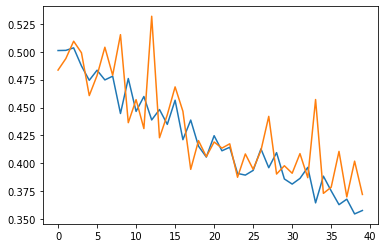

In [56]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Test model with a new picture from test folder in root directory

In [57]:
import cv2

cat_image = cv2.imread('/content/test/test/10064.jpg')
cat_image = cv2.resize(cat_image,(150,150))
# cat_image.shape
cat_image = cat_image.reshape((1,) + cat_image.shape)

result = model.predict(cat_image)
result = np.round(result,3)
result

array([[1.]], dtype=float32)